In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADBE', 'ADYEY', 'AMD', 'AMGN', 'AMZN',
    'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD', 'DDOG',
    'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH', 'GMED',
    'GOOG', 'IDXX', 'INTG', 'ISRG', 'JD', 'LRCX', 'LSPD', 'LULU', 'MDB',
    'MELI', 'MNST', 'MSFT', 'MTCH', 'NVCR', 'NVDA', 'ODFL', 'OKTA',
    'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON', 'PYPL', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'RIVN', 'RMD', 'ROKU', 'RVLV', 'SE', 'SHOP',
    'SNOW', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TSLA', 'TTD', 'TTWO',
    'TWLO', 'TWTR', 'TYL', 'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV', 'ZEN',
    'ZM']
LINGERERS = [
    'AMEH', 'AMRK', 'APT', 'BTTR', 'BYRN', 'CIZN', 'CTGO', 'CUBE',
    'DTST', 'DYAI', 'EP', 'FCPT', 'FCUV', 'GBOX', 'GME', 'HMY', 'IEI',
    'INTZ', 'KREF', 'MCVT', 'MNMD', 'MOBQ', 'NAN', 'OMQS', 'PETV',
    'POWW', 'PRPH', 'RVP', 'VIRT', 'WAVD']
BEST_WEIGHTED = [
    'CF', 'CSGP', 'CSIQ', 'CTSH', 'EPSN', 'FKWL', 'GCBC', 'GGE',
    'LFMD', 'MICS', 'NTAP', 'PACB', 'PARR', 'SIX', 'SNEX', 'SOBR',
    'UTHR', 'WKHS', 'ZYXI']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

76

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-10-22', datetime.date(2022, 10, 22))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  128 of 128 completed
Generating derived columns...
AAPL... ABMD... ABNB... ADBE... ADYEY... AMD... AMEH... AMGN... AMRK... AMZN... ANET... APT... ASML... AXON... BROS... BTTR... BYND... BYRN... CF... CHWY... CIZN... CRWD... CSGP... CSIQ... CTGO... CTSH... CUBE... DDOG... DOCS... DOCU... DTST... DUOL... DYAI... EDIT... EP... EPSN... ETSY... FCPT... FCUV... FKWL... FLGT... GBOX... GCBC... GGE... GH... GME... GMED... GOOG... HMY... IDXX... IEI... INTG... INTZ... ISRG... JD... KREF... LFMD... LRCX... LSPD... LULU... MCVT... MDB... MELI... MICS... MNMD... MNST... MOBQ... MSFT... MTCH... NAN... NTAP... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... PAC... PACB... PANW... PARR... PAYC... PETV... PINS... POWW... PRPH... PTON... PYPL... QDEL... RBLX... RDFN... RGEN... RIVN... RMD... ROKU... RVLV... RVP... SE... SHOP... SIX... SNEX... SNOW... SOBR... TASK... TDOC... TEAM... TREX... TSLA... TTD... TTWO... TWLO... TWTR... TYL... UPST... UTHR... 

In [5]:
data['Date'].tail()

2512   2022-10-17
2513   2022-10-18
2514   2022-10-19
2515   2022-10-20
2516   2022-10-21
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       0.985556
2       0.996915
3       1.002996
4       0.999271
5       1.000156
          ...   
2512    1.026480
2513    1.011428
2514    0.993328
2515    0.992049
2516    1.023725
Name: ^GSPC, Length: 2516, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.005102
2,1.001781
3,1.008484
4,1.004359
5,1.011058
...,...
2512,1.057772
2513,1.027433
2514,0.995199
2515,1.011933


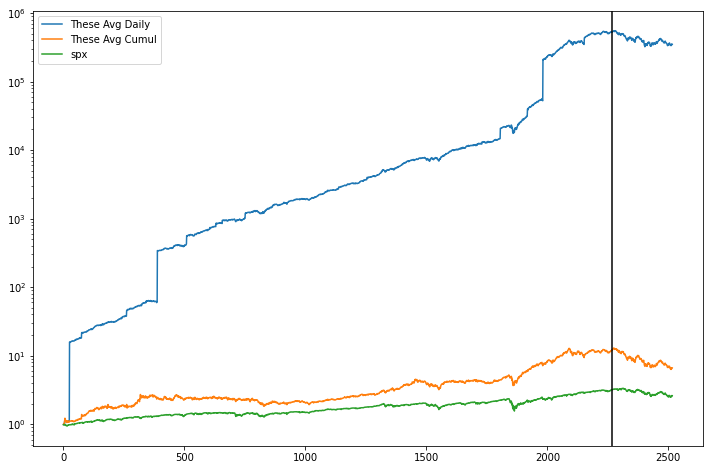

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-10-22,NaN,NaN
1,2012-10-23,0.998683,0.998683
2,2012-10-24,0.993517,0.993266
3,2012-10-25,0.988493,0.988174
4,2012-10-26,0.997269,0.996109


In [10]:
out.tail()

,Date,mine1,mine2
2512,2022-10-17,346354.693516,6.585616
2513,2022-10-18,351144.078215,6.655135
2514,2022-10-19,343343.628001,6.530240
2515,2022-10-20,344866.032530,6.520005
2516,2022-10-21,349291.500763,6.635054


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

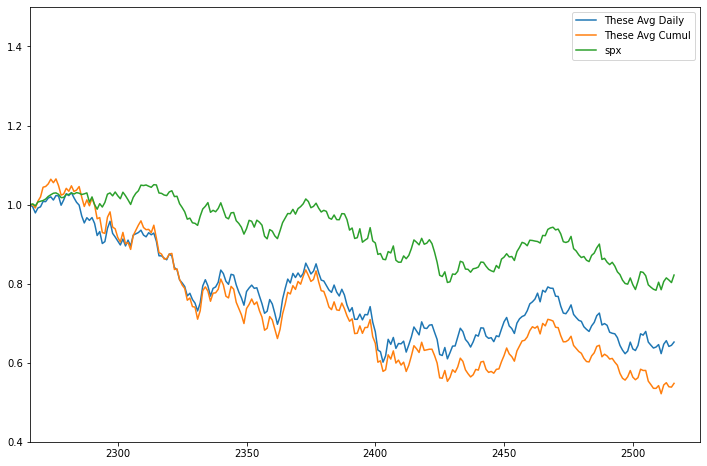

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2457,76.320000,76.320000,78.651001,75.330002,76.779999,4.334935,0.994009,0.994009,1.000000
2458,77.239998,77.239998,78.690002,74.105003,75.309998,4.346917,1.025627,1.012054,0.986766
2459,79.489998,79.489998,80.269997,74.699997,74.930000,4.375631,1.060857,1.029130,0.970093
2460,84.010002,84.010002,84.739998,80.735001,81.000000,4.430936,1.037161,1.056863,1.018996
2461,86.959999,86.959999,88.300003,84.022003,86.550003,4.465448,1.004737,1.035115,1.030235


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2457,76.320000,76.320000,78.651001,75.330002
2458,77.239998,77.239998,78.690002,74.105003
2459,79.489998,79.489998,80.269997,74.699997
2460,84.010002,84.010002,84.739998,80.735001
2461,86.959999,86.959999,88.300003,84.022003


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2457,76.320000,76.320000,78.651001,75.330002,78.690002,74.105003,1.031053,0.970978
2458,77.239998,77.239998,78.690002,74.105003,80.269997,74.699997,1.039228,0.967115
2459,79.489998,79.489998,80.269997,74.699997,84.739998,80.735001,1.066046,1.015662
2460,84.010002,84.010002,84.739998,80.735001,88.300003,84.022003,1.051065,1.000143
2461,86.959999,86.959999,88.300003,84.022003,89.550003,83.900002,1.029784,0.964811


0.05    0.972027
Name: HighMult, dtype: float64


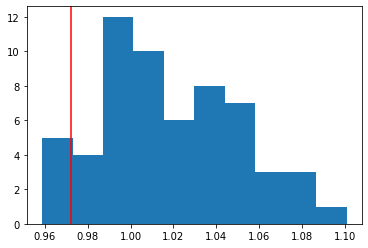

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0163087956042671


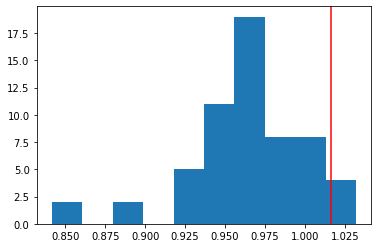

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0163087956042671, 0.9720266298930161)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.012031629887652, 0.9896874903139407)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2457,76.320000,76.320000,78.651001,75.330002,78.690002,74.105003,1.031053,0.970978,0
2458,77.239998,77.239998,78.690002,74.105003,80.269997,74.699997,1.039228,0.967115,1
2459,79.489998,79.489998,80.269997,74.699997,84.739998,80.735001,1.066046,1.015662,1
2460,84.010002,84.010002,84.739998,80.735001,88.300003,84.022003,1.051065,1.000143,1
2461,86.959999,86.959999,88.300003,84.022003,89.550003,83.900002,1.029784,0.964811,1


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0118150977300293,
 0.9654714067905995,
 1.0229342970165614,
 0.9772781232521854)

In [27]:
get_hilo_mults(aapl)

(1.0063915875326686, 0.9891210248236924, 1.01226414179611, 0.991685189035051)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=[
        'stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
        'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.006392,0.989121,1.012264,0.991685
1,ABMD,1.009418,0.994725,1.002114,0.990777
2,ABNB,1.014973,0.985459,1.012141,0.992486
3,ADBE,1.013072,0.989323,1.007001,0.970945
4,ADYEY,1.035005,0.970007,1.022655,0.964839


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,147.270004,AAPL
ABMD,256.220001,ABMD
ABNB,119.949997,ABNB
ADBE,306.369995,ADBE
ADYEY,13.06,ADYEY
...,...,...
ZM,80.980003,ZM
ZYXI,9.0,ZYXI
^GSPC,3752.75,^GSPC
^IXIC,10859.71582,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.006392,0.989121,1.012264,0.991685,147.270004
1,ABMD,1.009418,0.994725,1.002114,0.990777,256.220001
2,ABNB,1.014973,0.985459,1.012141,0.992486,119.949997
3,ADBE,1.013072,0.989323,1.007001,0.970945,306.369995
4,ADYEY,1.035005,0.970007,1.022655,0.964839,13.06


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv